## Student Performance indicator 

#### life cycle of Machine learning project

- understanding the problem statement 
- Data collection 
- Data Checks to perform 
- Exploratory data analysis 
- Data pre-processing 
- Model Training 
- Choose best model 

#### 1) Problem statement

- This project understand hoew the student's performance(test scores) is affected by other variables such as Gender, Ethinicity, Parantal level of education, lunch and Test preparation course.

#### 2) Data Collection

- Dataset Source -https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
- The data consist of 8  column and 1000 rows.

### import data and required packages

#### importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### import the CSV Data as Pandas Dataframe 

In [83]:
df = pd.read_csv('data/stud.csv')

##### top 5 record 

In [84]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### data shape

In [85]:
 df.shape

(1000, 8)

### Dataset information

- gender:sex of students->(male/female)
- race/ethnicity: ethnicity of students ->(Group A,B,C,D,E)
- parental level of education: parents final education -> (bachelors's degree,master's degree, associate's degree,high school)
- lunch: having lunch before test(standard or free/reduced)
- test preparation course: complete or not complete before test
- maths score 
- reading score 
- writing score 

### 3. Data checks to perform 

- check misssing values 
- check dupllicate values 
- check  data type
- check the number of unique values of each columns 
- check statistics of data set 
- check various catagories present in the different categorical column 

### 3.1 check missing  values 

In [86]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### there are no missing value in data 

### 3.2 check duplicate

In [87]:
df.duplicated().sum()

np.int64(0)

##### no duplicate value in this data set

### 3.3 check data types

In [88]:
# check null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 check the number of unique value in every column

In [89]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 check statistics of data set 

In [90]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight 

- from above description for numarical data, all mean are very close to each other - between 66 and 68.05;
- All standard devaitions are also close -between 14.6 to 15.19;
-while there is a minimum score 0 for math,for writing min score is 10 and for reading minimum score is 17
-maximum is 100 for all 3 subjects 
 

### 3.7 Exploring Data

In [91]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" ") 
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [92]:
# define numaical and categorical columns
numerical_features = {feature for feature in df.columns if df[feature].dtype != 'O'}
categorical_features = {feature for feature in df.columns if df[feature].dtype == 'O'}

# print columns
print('we have {} numerical feature : {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical feature : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical feature : {'math_score', 'writing_score', 'reading_score'}
we have 5 categorical feature : {'test_preparation_course', 'gender', 'lunch', 'parental_level_of_education', 'race_ethnicity'}


### 3.8 Adding column for "total score" and "average"

In [93]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [94]:
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]

print(f' the number of students with full marks in reading are : {reading_full}')
print(f' the number of studdnts with full marks in writing are : {writing_full}')
print (f' the number of students with full marks in math are : {math_full}')

 the number of students with full marks in reading are : 17
 the number of studdnts with full marks in writing are : 14
 the number of students with full marks in math are : 7


In [95]:
reading_less_than_20 = df[df['reading_score'] < 20].shape[0]
writing_less_than_20 = df[df['writing_score'] < 20].shape[0]
math_less_than_20 = df[df['math_score'] < 20].shape[0]

print(f' the number of students with less than 20 marks in reading are : {reading_less_than_20}')
print(f' the number of students with less than 20 marks in writing are : {writing_less_than_20}')
print(f' the number of students with less than 20 marks in math are : {math_less_than_20}')

 the number of students with less than 20 marks in reading are : 1
 the number of students with less than 20 marks in writing are : 3
 the number of students with less than 20 marks in math are : 4


### insights

- student perform bad in maths 
- student perform good in reading section
- student perform average in writing section

### Exploring data (Visualization)

#### 4.1 Visualize average score  distridution to make some conclusion

- histogram
- kernal Distribution function (KDE)

## average score distibution male vs female 

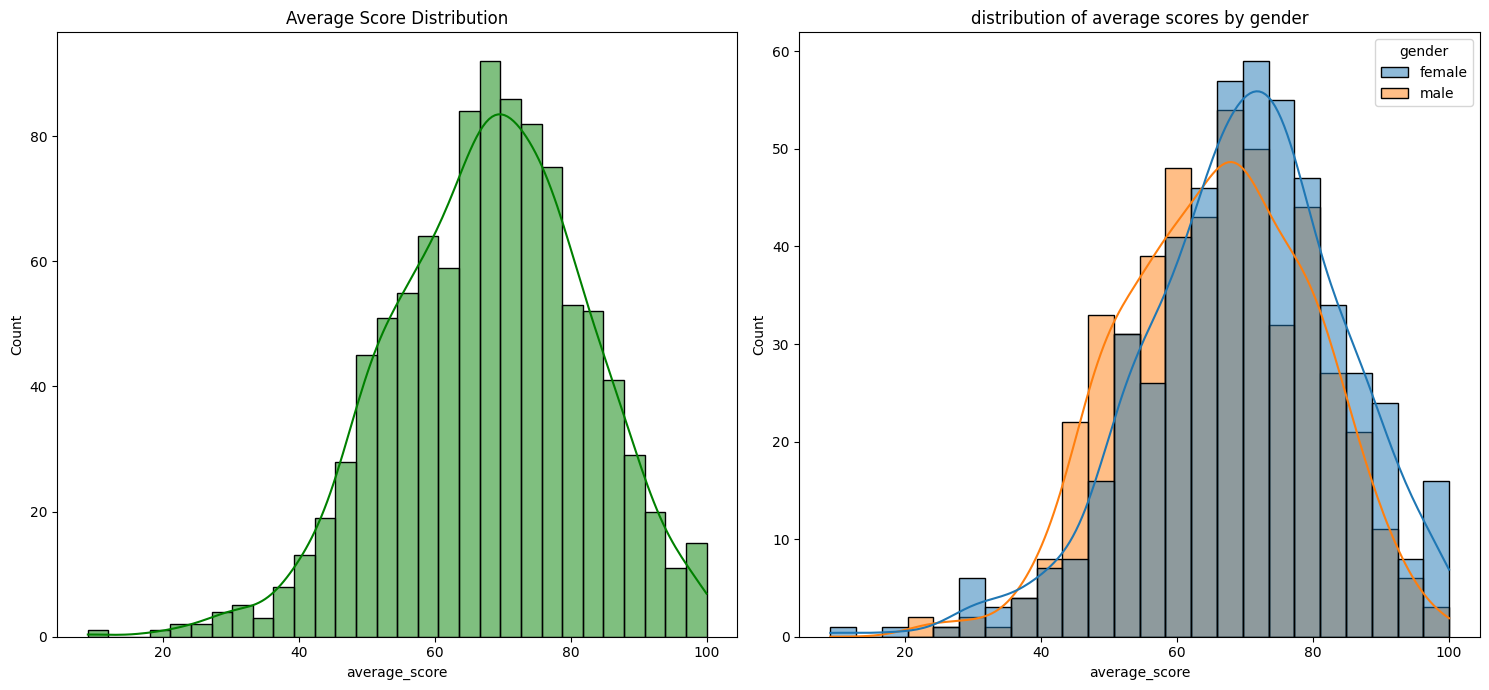

In [96]:
fig, axs = plt.subplots(1, 2,figsize=(15,7))

sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g',  ax=axs[0])
axs[0].set_title('Average Score Distribution')

sns.histplot(data=df, x='average_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('distribution of average scores by gender')

plt.tight_layout()
plt.show()

### insights

- scores are normally distributed 
- from 50 to 80 the counts are high
- females have scores marginally better than males
- males have broad number of scores

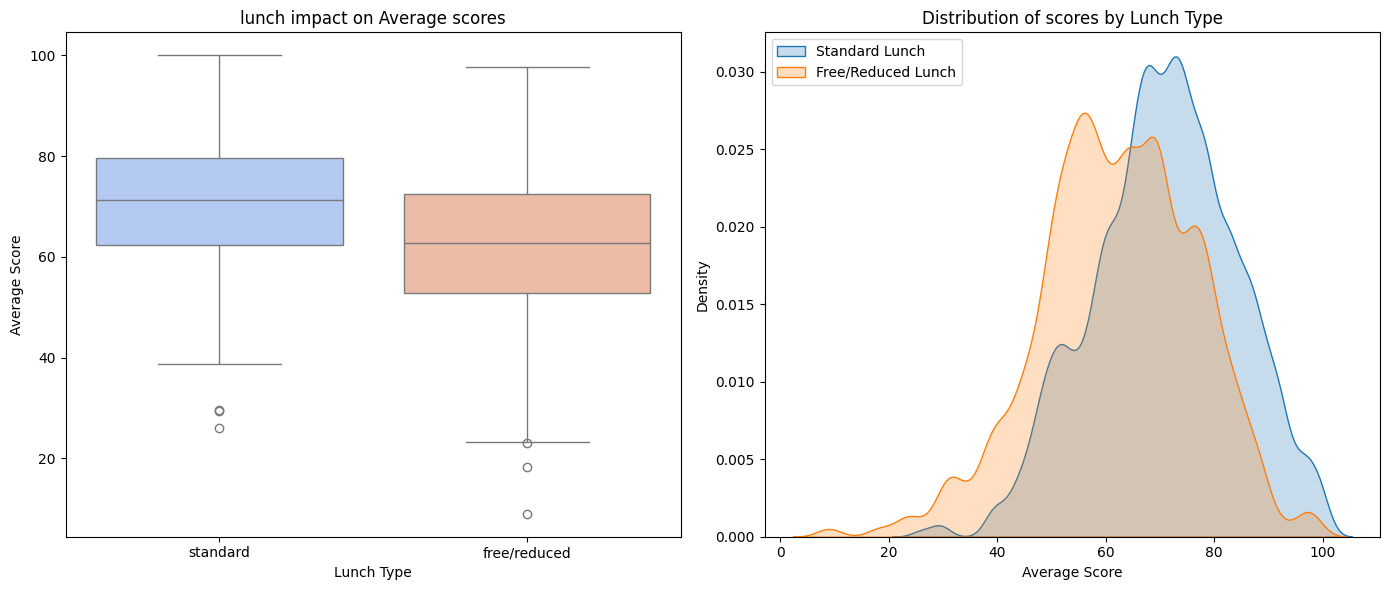

In [97]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot - Comparing scores by Lunch Type
sns.boxplot(x=df["lunch"], y=df["average_score"], palette="coolwarm", ax=axes[0])
axes[0].set_title("lunch impact on Average scores")
axes[0].set_xlabel("Lunch Type")
axes[0].set_ylabel("Average Score")

#  KDE Plot - distributing scores by Lunch Type
sns.kdeplot(df[df["lunch"] == "standard"]["average_score"], label="Standard Lunch", fill=True, ax=axes[1],bw_adjust=0.5)
sns.kdeplot(df[df["lunch"] == "free/reduced"]["average_score"], label="Free/Reduced Lunch", fill=True, ax=axes[1], bw_adjust=0.5)
axes[1].set_title("Distribution of scores by Lunch Type")
axes[1].set_xlabel("Average Score")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()

### insight 

- students with standard lunch perform better 
- students with free/reduced lunch show more variablity and some of student have low scoring outliner 
- there is a slight impact of nutrition in students performance 

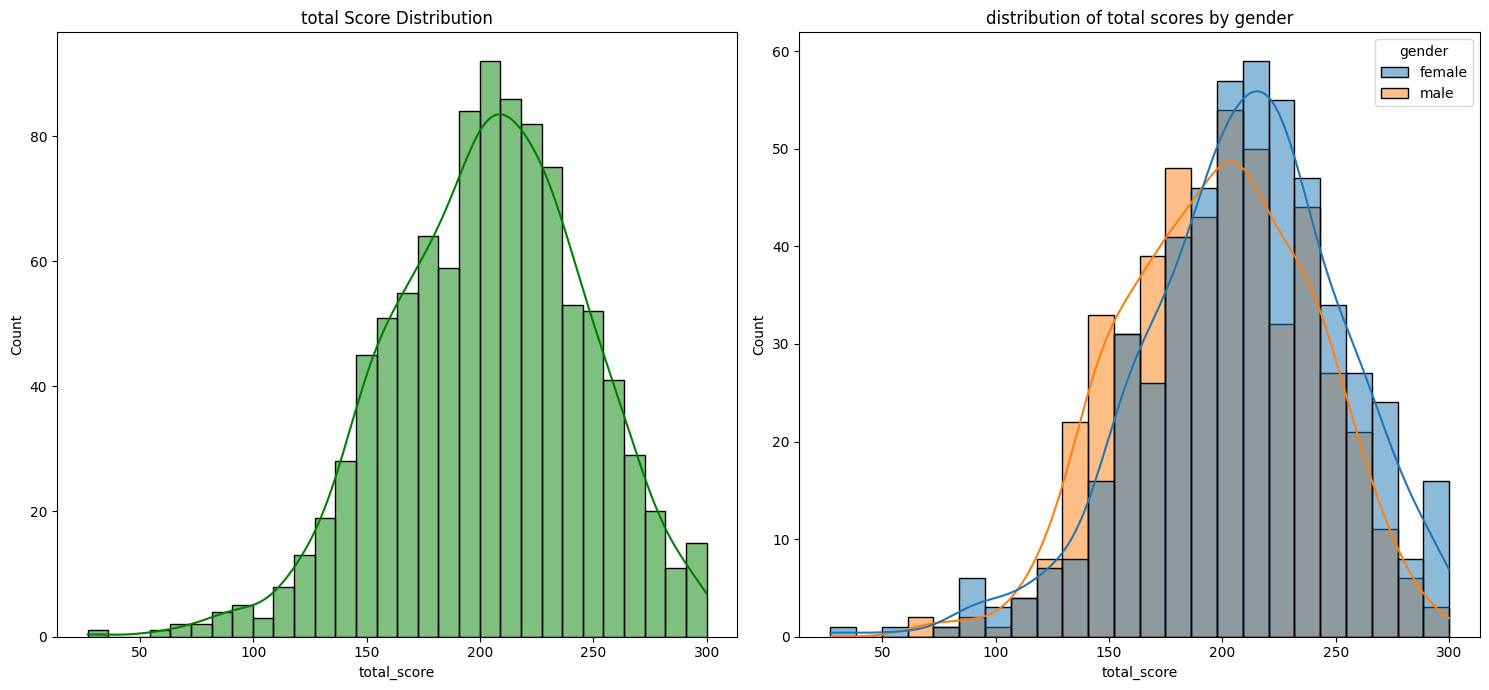

In [98]:
fig, axs = plt.subplots(1, 2,figsize=(15,7))

sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g',  ax=axs[0])
axs[0].set_title('total Score Distribution')

sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('distribution of total scores by gender')

plt.tight_layout()
plt.show()

###  insights

- females scored highest as well as lowest also
- males have better distribution between high and low 

In [99]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### score distribution by race_ethnicity

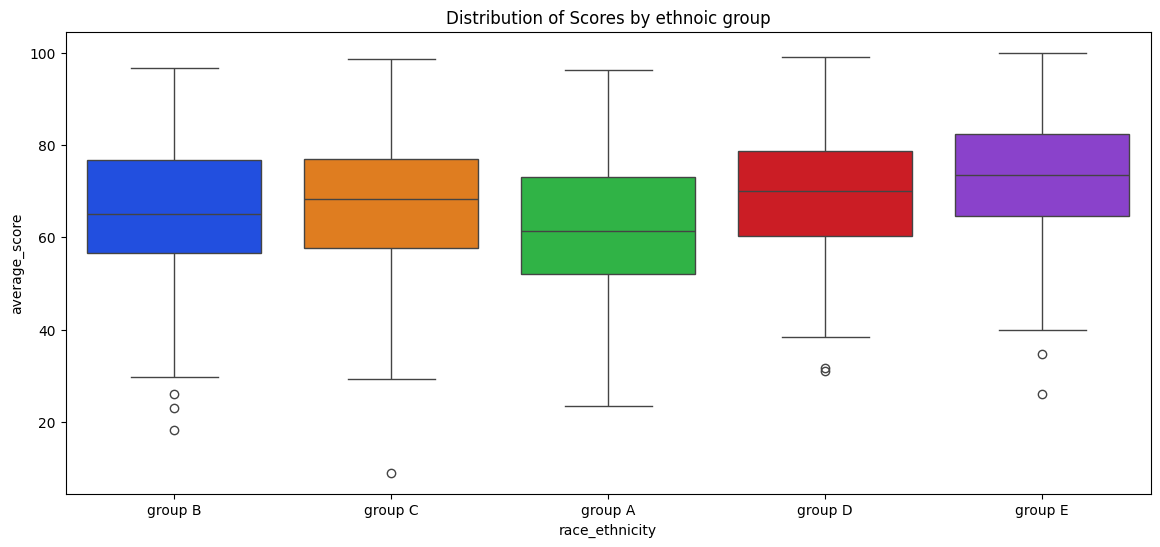

In [100]:
plt.subplots(1, figsize=(14, 6))
sns.boxplot(x="race_ethnicity", y="average_score", data=df, palette="bright")
plt.title("Distribution of Scores by ethnoic group")

plt.show()


#### insight

- Group D and E perform slightly better
- Group A perform singnificantly lower
- presence of outliers shows that some student perform very lower than other esapcially Group C

### score distribution by test prepartion course

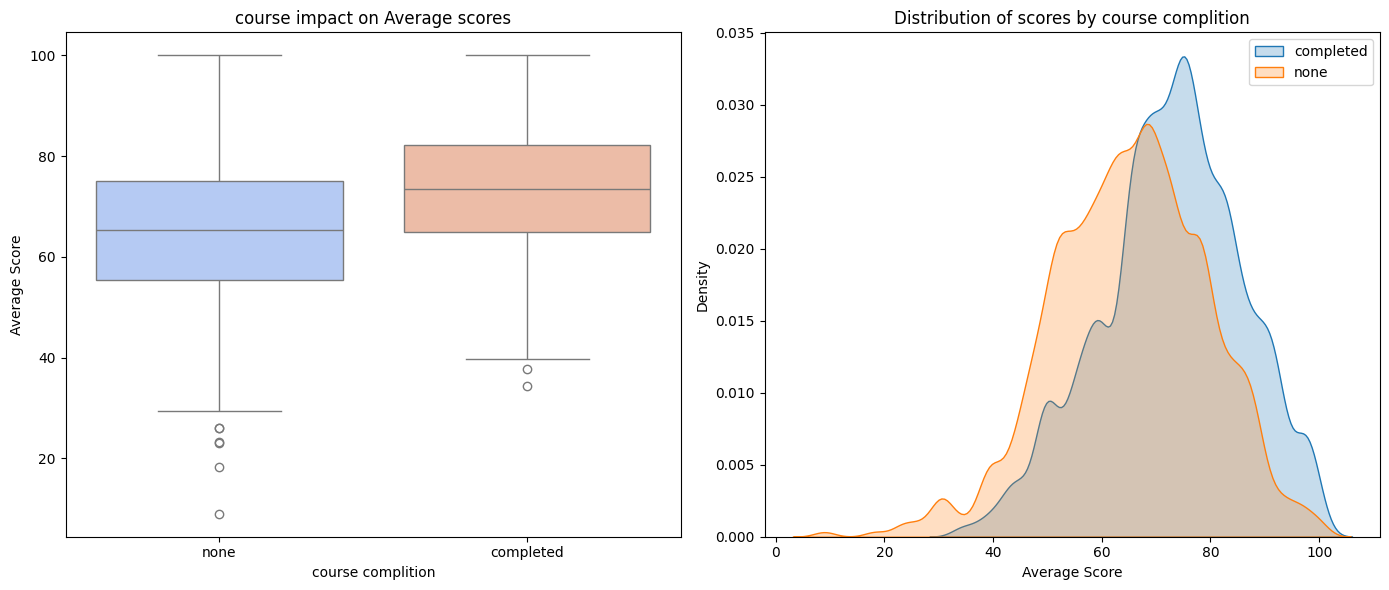

In [101]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot - Comparing scores by course complition
sns.boxplot(x=df["test_preparation_course"], y=df["average_score"], palette="coolwarm", ax=axes[0])
axes[0].set_title("course impact on Average scores")
axes[0].set_xlabel("course complition")
axes[0].set_ylabel("Average Score")

#  KDE Plot - distributing scores by course complition
sns.kdeplot(df[df["test_preparation_course"] == "completed"]["average_score"], label="completed", fill=True, ax=axes[1],bw_adjust=0.5)
sns.kdeplot(df[df["test_preparation_course"] == "none"]["average_score"], label="none", fill=True, ax=axes[1], bw_adjust=0.5)
axes[1].set_title("Distribution of scores by course complition")
axes[1].set_xlabel("Average Score")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()

### insight 

- completing the course has positively impact on students,  with high and consistent performance 
- students who didnt complete the course are more likely to score less and have more variation

### distribution of score absed on parental_level_of_education

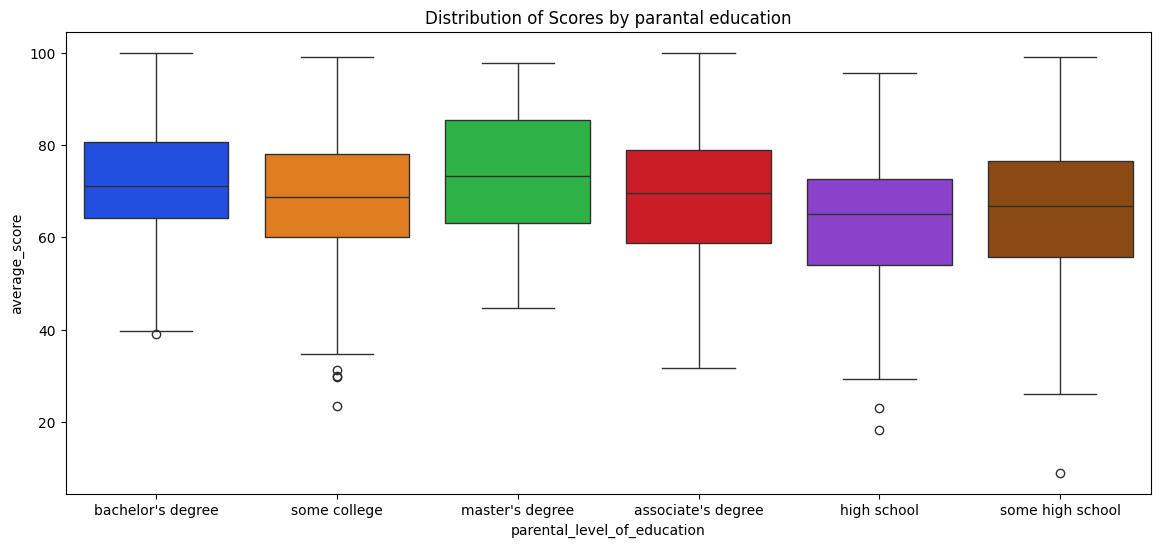

In [102]:
plt.subplots(1, figsize=(14, 6))
sns.boxplot(x="parental_level_of_education", y="average_score", data=df, palette="bright")
plt.title("Distribution of Scores by parantal education")

plt.show()


### insight

- students whose parents have a master's degree have perform very better followed by bachelor's degree
- students whose parents have done high school or some high school have low scores
- parental education  appears to ahve a positive impact on student performance

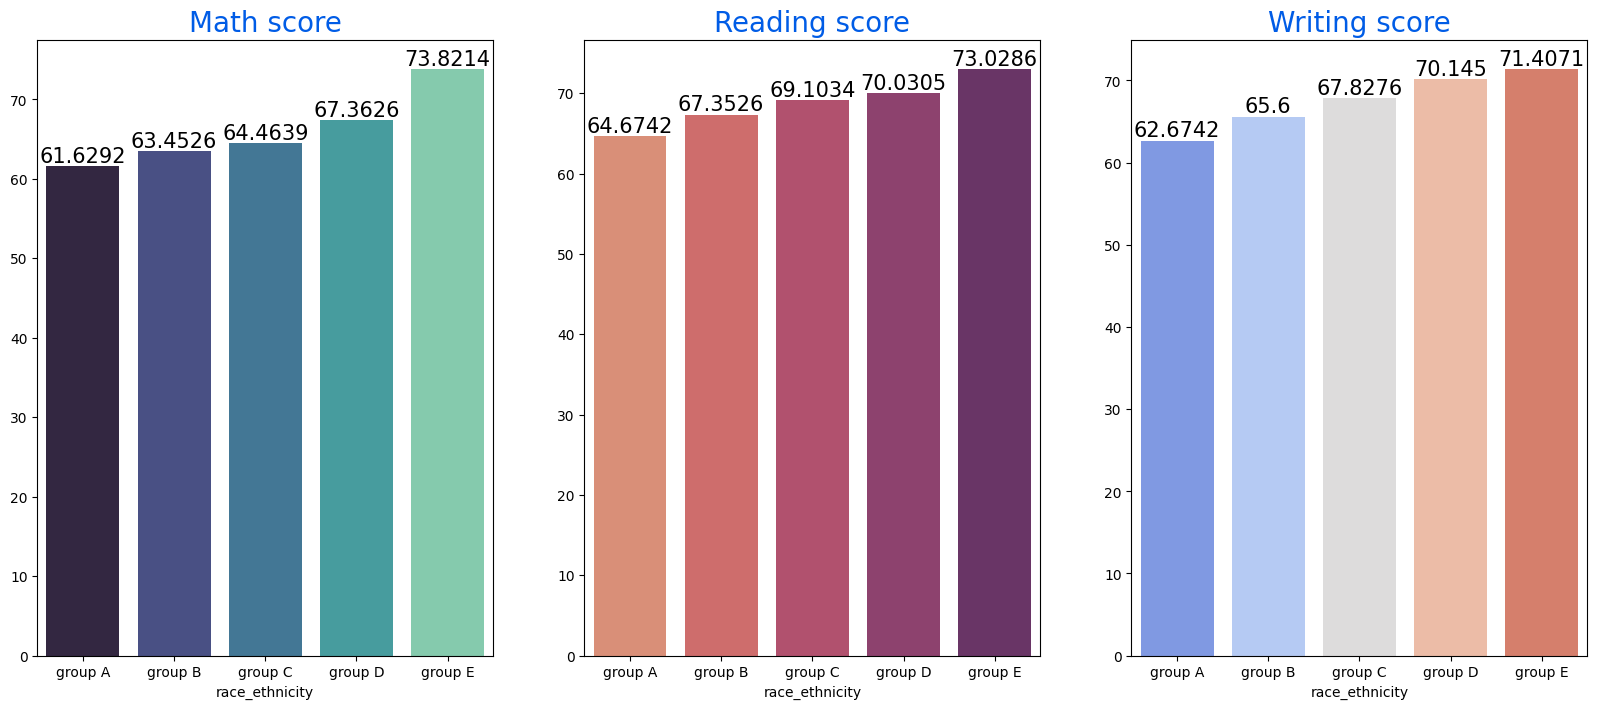

In [103]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20) 

for container in ax[0].containers: 
    ax[0].bar_label(container,color='black',size=15) 

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20) 

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

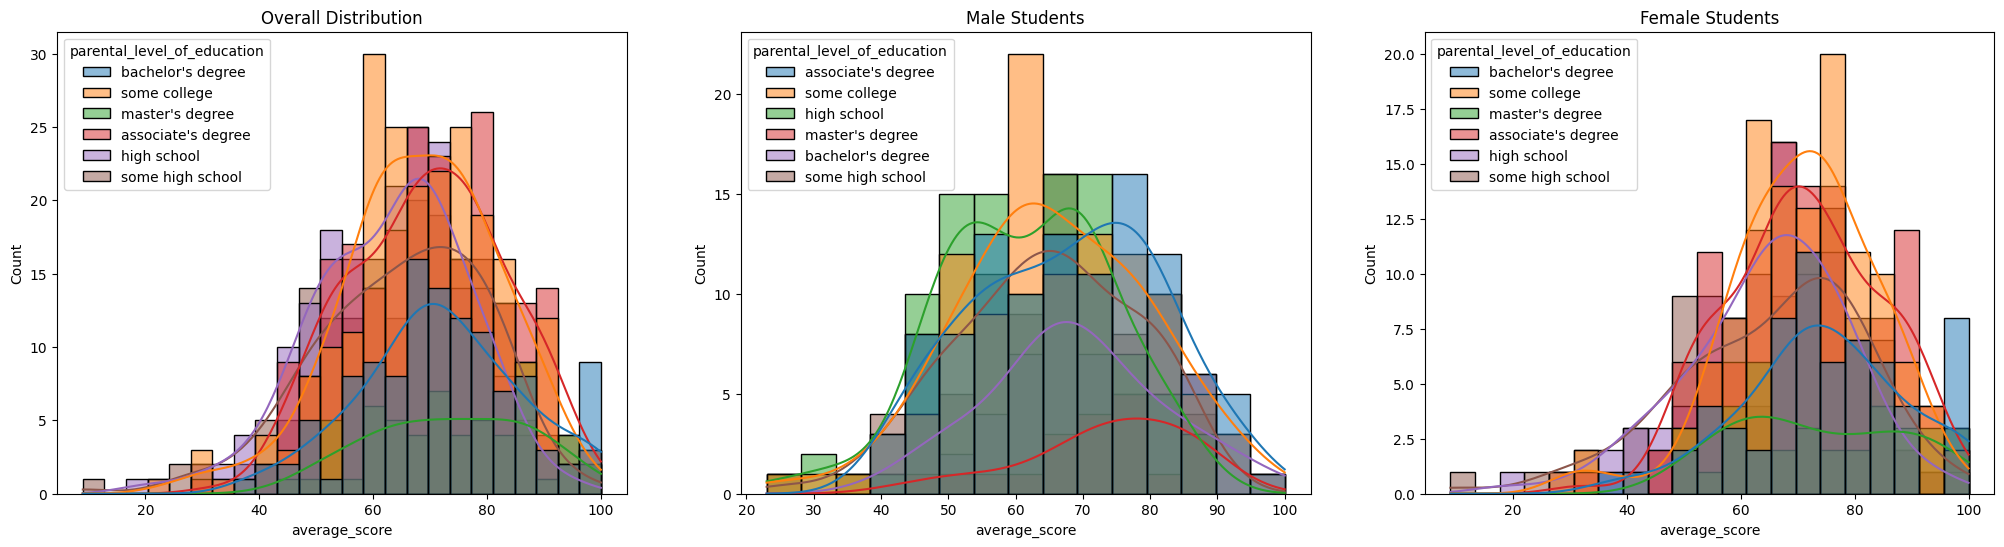

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Overall distribution
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title("Overall Distribution")

# Male students
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title("Male Students")

# Female students
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title("Female Students")

plt.show()